# Overfitting task

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Data Preprocessing

In [8]:
url = 'spotify.csv'
df = pd.read_csv(url)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [10]:
df.shape

(32833, 23)

In [11]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [12]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


## Select Features

In [13]:
# Selecting only the columns you want to keep  
df = df[['track_popularity','danceability',
         'energy', 'loudness', 'speechiness','mode', 'key',
         'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
         'duration_ms', 'track_album_release_date']]

df['track_album_release_date'] = df['track_album_release_date'].apply(lambda x: int(x.split('-')[0]) if '-' in x else int(x))
df

,track_popularity,danceability,energy,loudness,speechiness,mode,key,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,track_album_release_date
0,66,0.748,0.916,-2.634,0.0583,1,6,0.102000,0.000000,0.0653,0.5180,122.036,194754,2019
1,67,0.726,0.815,-4.969,0.0373,1,11,0.072400,0.004210,0.3570,0.6930,99.972,162600,2019
2,70,0.675,0.931,-3.432,0.0742,0,1,0.079400,0.000023,0.1100,0.6130,124.008,176616,2019
3,60,0.718,0.930,-3.778,0.1020,1,7,0.028700,0.000009,0.2040,0.2770,121.956,169093,2019
4,69,0.650,0.833,-4.672,0.0359,1,1,0.080300,0.000000,0.0833,0.7250,123.976,189052,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,42,0.428,0.922,-1.814,0.0936,1,2,0.076600,0.000000,0.0668,0.2100,128.170,204375,2014
32829,20,0.522,0.786,-4.462,0.0420,1,0,0.001710,0.004270,0.3750,0.4000,128.041,353120,2013
32830,14,0.529,0.821,-4.899,0.0481,0,6,0.108000,0.000001,0.1500,0.4360,127.989,210112,2014
32831,15,0.626,0.888,-3.361,0.1090,1,2,0.007920,0.127000,0.3430,0.3080,128.008,367432,2014


In [14]:
df.isna().sum()

track_popularity            0
danceability                0
energy                      0
loudness                    0
speechiness                 0
mode                        0
key                         0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
track_album_release_date    0
dtype: int64

In [15]:
df.isnull().sum()

track_popularity            0
danceability                0
energy                      0
loudness                    0
speechiness                 0
mode                        0
key                         0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
track_album_release_date    0
dtype: int64

In [16]:
df = df.drop_duplicates()
df.duplicated().sum()

0

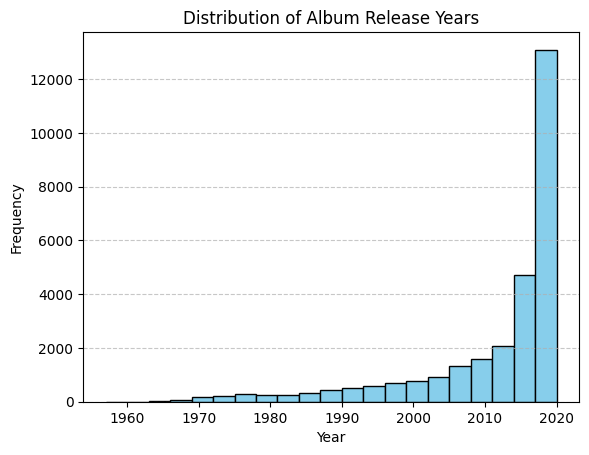

In [17]:
targets = df["track_album_release_date"]

# Plotting the histogram
plt.hist(targets, bins=range(targets.min(), targets.max() + 1, 3),color='skyblue', edgecolor='black', alpha=1)
plt.title('Distribution of Album Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [18]:
columns = df.columns
types = df.dtypes
print(columns)
print(types)

Index(['track_popularity', 'danceability', 'energy', 'loudness', 'speechiness',
       'mode', 'key', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'track_album_release_date'],
      dtype='object')
track_popularity              int64
danceability                float64
energy                      float64
loudness                    float64
speechiness                 float64
mode                          int64
key                           int64
acousticness                float64
instrumentalness            float64
liveness                    float64
valence                     float64
tempo                       float64
duration_ms                   int64
track_album_release_date      int64
dtype: object


In [19]:
data = df.values
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(28338, 13)
(28338,)


In [20]:
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.66       0.76093591 0.9159853  0.91808981 0.06350763 1.
 0.54545455 0.10261569 0.         0.06556225 0.52270434 0.50967257
 0.37125397]


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=42, test_size=0.2)
X_train.shape, y_train.shape

((22670, 13), (22670,))

In [22]:
# Train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

# Detect Overfitting

In [23]:
# Calculate training error
y_train_pred = model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Calculate test error
y_test_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print(f"Model: {model.__class__.__name__}")
print("Training Mean Squared Error:", train_mse)
print("Training Mean Absolute Error:", train_mae)
print("Test Mean Squared Error:", test_mse)
print("Test Mean Absolute Error:", test_mae)

Model: DecisionTreeRegressor
Training Mean Squared Error: 0.0007940008822232025
Training Mean Absolute Error: 0.0002646669607410675
Test Mean Squared Error: 142.02911079745942
Test Mean Absolute Error: 7.1314396612561755


## Learning Curve

C:\Users\ToanGTV\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\ToanGTV\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


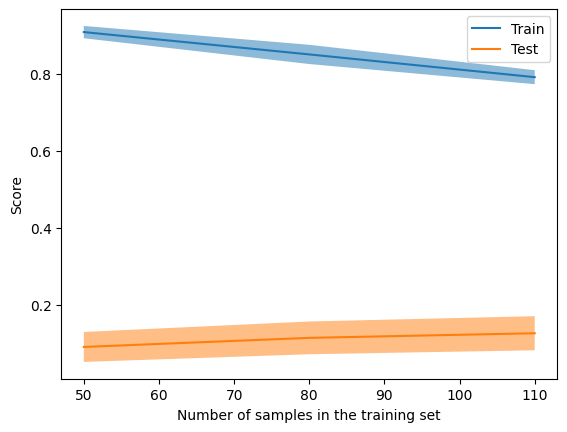

In [24]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import LearningCurveDisplay
from sklearn.svm import SVC


train_sizes, train_scores, valid_scores = learning_curve(
    SVC(kernel='poly'), X_train, y_train, train_sizes=[50, 80, 110], cv=5)

LearningCurveDisplay.from_estimator(
   SVC(kernel='poly'), X_train, y_train, train_sizes=[50, 80, 110], cv=5)



## Validation curve

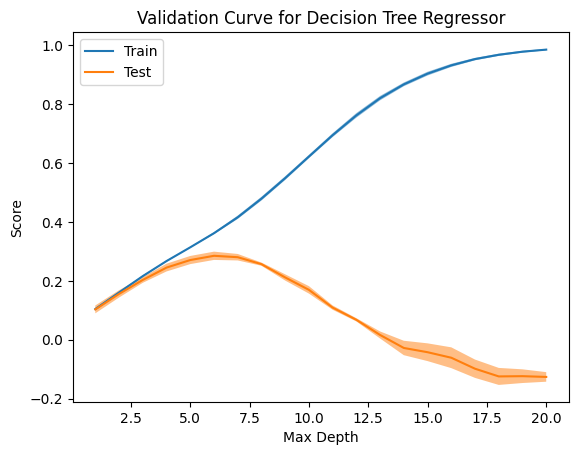

In [25]:
param_range = np.arange(1, 21)
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), X_train, y_train, param_name="max_depth", param_range=param_range, cv=5
)


viz = ValidationCurveDisplay(param_name="max_depth", param_range=param_range,
                             train_scores=train_scores, test_scores=test_scores)
viz.plot()
plt.title("Validation Curve for Decision Tree Regressor")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.show()

# Reduce Overfitting

## Hyperparameters tunning

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Model Training Mean Squared Error: 75.36926509775917
Best Model Training Mean Absolute Error: 5.815851064503004
Best Model Test Mean Squared Error: 88.23758069642898
Best Model Test Mean SquAbsoluteared Error: 6.152839913307832


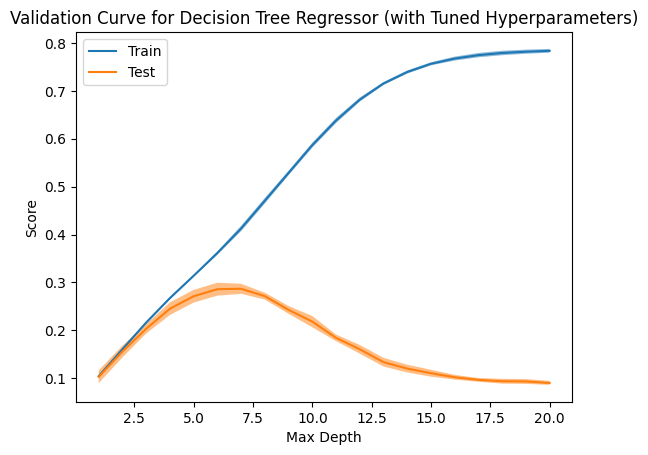

In [26]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
best_train_mse = mean_squared_error(y_train, best_model.predict(X_train))
best_test_mse = mean_squared_error(y_test, best_model.predict(X_test))

best_train_mae = mean_absolute_error(y_train, best_model.predict(X_train))
best_test_mae = mean_absolute_error(y_test, best_model.predict(X_test))

print("Best Parameters:", best_params)
print("Best Model Training Mean Squared Error:", best_train_mse)
print("Best Model Training Mean Absolute Error:", best_train_mae)

print("Best Model Test Mean Squared Error:", best_test_mse)
print("Best Model Test Mean SquAbsoluteared Error:", best_test_mae)

# Now, visualize the validation curve again with the best model
param_range = np.arange(1, 21)
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(**best_params), X_train, y_train, param_name="max_depth", param_range=param_range, cv=5
)

viz = ValidationCurveDisplay(param_name="max_depth", param_range=param_range,
                             train_scores=train_scores, test_scores=test_scores)
viz.plot()
plt.title("Validation Curve for Decision Tree Regressor (with Tuned Hyperparameters)")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.show()


## Early Stopping

In [27]:
# Define the range of hyperparameters to search over
param_range = range(1, 21)

best_val_error = float('inf')
best_model = None
best_depth = None

# Perform cross-validation with early stopping
for max_depth in param_range:
    model = DecisionTreeRegressor(max_depth=max_depth)
    
    # Perform cross-validation with 5 folds
    val_errors = -cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    
    # Calculate mean validation error
    mean_val_error = np.mean(val_errors)
    
    # Check if mean validation error has improved
    if mean_val_error < best_val_error:
        best_val_error = mean_val_error
        best_model = model
        best_depth = max_depth
    else:
        # Stop searching if validation error starts to increase
        break

# Train the best model on the entire training set
best_model.fit(X_train, y_train)
print("Best Max Depth:", best_depth)


Best Max Depth: 6


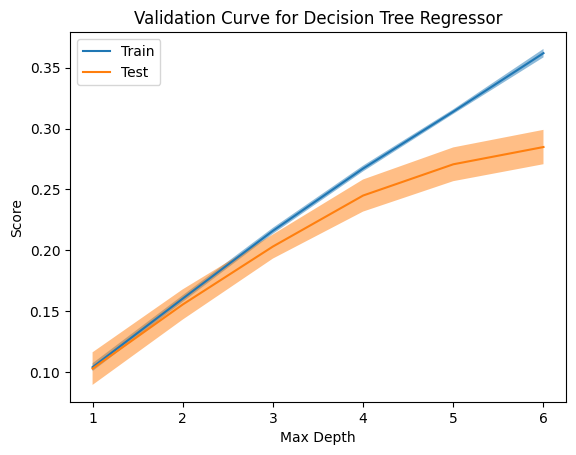

In [28]:
# Define the range of hyperparameters to plot
param_range = range(1, best_depth + 1)

# Calculate validation curve
train_scores, test_scores = validation_curve(
    DecisionTreeRegressor(), X_train, y_train, param_name="max_depth", param_range=param_range, cv=5
)

# Plot the validation curve
viz = ValidationCurveDisplay(param_name="max_depth", param_range=param_range,
                             train_scores=train_scores, test_scores=test_scores)
viz.plot()
plt.title("Validation Curve for Decision Tree Regressor")
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.show()


In [29]:
# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
test_error = mean_squared_error(y_test, y_test_pred)

print("Test Mean Squared Error:", test_error)

Test Mean Squared Error: 89.64736875825784


In [44]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Tạo mô hình với Ridge Regression và điều chỉnh hệ số alpha (lambda)
alpha = 0.5  # Hệ số regularization
ridge_model = Ridge(alpha=alpha)

# Huấn luyện mô hình
ridge_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Đánh giá mô hình
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Training Mean Squared Error:", train_mse)
print("Training Mean Absolute Error:", train_mae)
print("Test Mean Squared Error:", test_mse)
print("Test Mean Absolute Error:", test_mae)

Training Mean Squared Error: 87.50504668054874
Training Mean Absolute Error: 6.808169858006977
Test Mean Squared Error: 89.27947834259471
Test Mean Absolute Error: 6.815234848891318


In [53]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

alpha = 0.001  # Hệ số regularization
lasso_model = Lasso(alpha=alpha)

# Huấn luyện mô hình
lasso_model.fit(X_train, y_train)

# Dự đoán trên tập huấn luyện và tập kiểm tra
y_train_pred = lasso_model.predict(X_train)
y_test_pred = lasso_model.predict(X_test)

# Đánh giá mô hình
train_mse = mean_squared_error(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Training Mean Squared Error:", train_mse)
print("Training Mean Absolute Error:", train_mae)
print("Test Mean Squared Error:", test_mse)
print("Test Mean Absolute Error:", test_mae)


Training Mean Squared Error: 87.50484658817729
Training Mean Absolute Error: 6.80746031155994
Test Mean Squared Error: 89.28955202234432
Test Mean Absolute Error: 6.8150180974963686
